In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [5]:
column=['workclass','education','marital-status','occupation','relationship','race','sex','country','salary']

In [6]:
for col in column:
    x=df[col].value_counts()
    print('{} \n'.format(x))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

In [7]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [8]:
data=df.copy()

In [9]:
def replace(col):
    if col==' ?':
        return ' Private'
    else:
        return col
data['workclass']=data['workclass'].apply(replace)

In [10]:
data['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
data['occupation'].mode()[0]

' Prof-specialty'

In [12]:
def replace(col):
    if col==' ?':
        return ' Prof-specialty'
    else:
        return col
data['occupation']=data['occupation'].apply(replace)

In [13]:
data['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
data['country'].mode()[0]

' United-States'

In [15]:
def replace(col):
    if col==' ?':
        return ' United-States'
    else:
        return col
data['country']=data['country'].apply(replace)

In [16]:
data['country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [17]:
data.drop(columns={'capital-gain','capital-loss','fnlwgt','country'},inplace=True)

In [18]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [19]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
salary            object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [21]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,6,9,13,4,0,1,4,1,40,0
1,50,5,9,13,2,3,0,4,1,13,0
2,38,3,11,9,0,5,1,4,1,40,0
3,53,3,1,7,2,5,0,2,1,40,0
4,28,3,9,13,2,9,5,2,0,40,0


<AxesSubplot:>

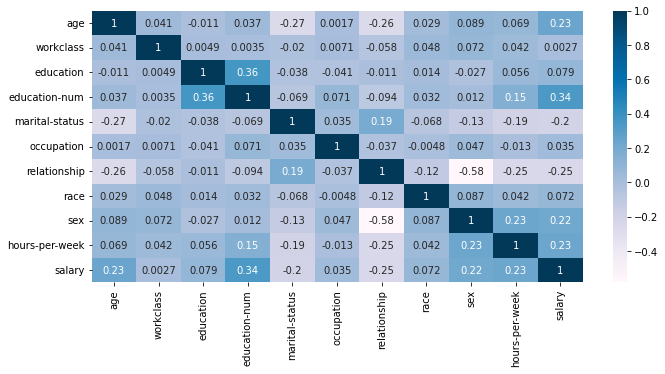

In [22]:
plt.figure(figsize=(11,5),facecolor='white')
sns.heatmap(data.corr(),cmap='PuBu',annot=True)

<AxesSubplot:xlabel='salary', ylabel='count'>

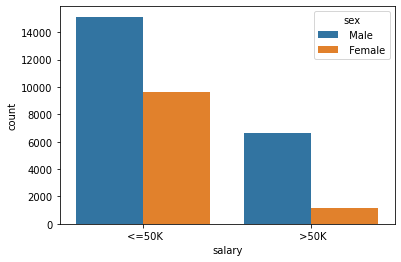

In [23]:
sns.countplot(data=df,x='salary',hue='sex')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

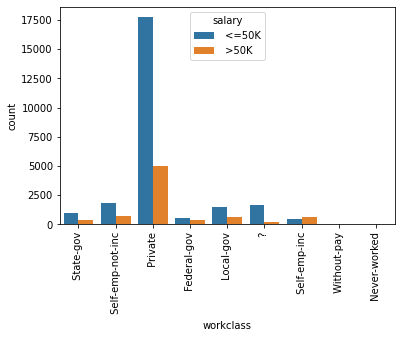

In [24]:
sns.countplot(data=df,x='workclass',hue='salary')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'workclass'),
  Text(2, 0, 'education'),
  Text(3, 0, 'education-num'),
  Text(4, 0, 'marital-status'),
  Text(5, 0, 'occupation'),
  Text(6, 0, 'relationship'),
  Text(7, 0, 'race'),
  Text(8, 0, 'sex'),
  Text(9, 0, 'hours-per-week'),
  Text(10, 0, 'salary')])

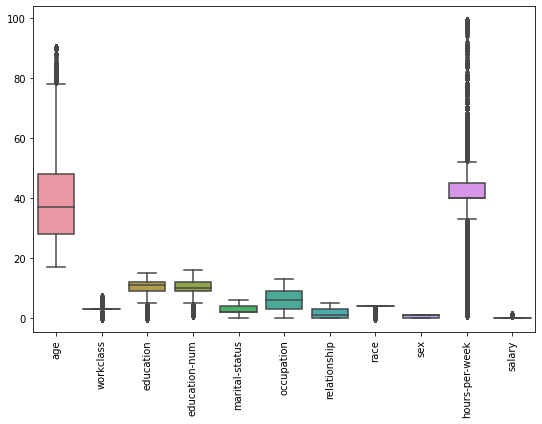

In [25]:
plt.figure(figsize=(9,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [26]:
data.shape

(32561, 11)

In [27]:
Q1=df['hours-per-week'].quantile(0.25)
Q3=df['hours-per-week'].quantile(0.75)
Q1, Q3

(40.0, 45.0)

In [28]:
IQR=Q3-Q1
IQR

5.0

In [29]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(32.5, 52.5)

In [30]:
data=data[(data['hours-per-week']<lower_limit) | (data['hours-per-week']<upper_limit)]
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,6,9,13,4,0,1,4,1,40,0
1,50,5,9,13,2,3,0,4,1,13,0
2,38,3,11,9,0,5,1,4,1,40,0
3,53,3,1,7,2,5,0,2,1,40,0
4,28,3,9,13,2,9,5,2,0,40,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'workclass'),
  Text(2, 0, 'education'),
  Text(3, 0, 'education-num'),
  Text(4, 0, 'marital-status'),
  Text(5, 0, 'occupation'),
  Text(6, 0, 'relationship'),
  Text(7, 0, 'race'),
  Text(8, 0, 'sex'),
  Text(9, 0, 'hours-per-week'),
  Text(10, 0, 'salary')])

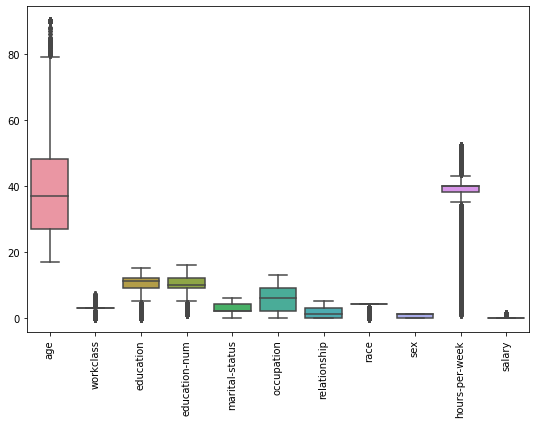

In [31]:
plt.figure(figsize=(9,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [32]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39,6,9,13,4,0,1,4,1,40,0
1,50,5,9,13,2,3,0,4,1,13,0
2,38,3,11,9,0,5,1,4,1,40,0
3,53,3,1,7,2,5,0,2,1,40,0
4,28,3,9,13,2,9,5,2,0,40,0


In [33]:
data=data.rename(columns={'education-num':'education_num','marital-status':'marital_status','hours-per-week':'hours_per_week'})

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data.iloc[:,[0,3,9]]=sc.fit_transform(data.iloc[:,[0,3,9]])
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,0.046770,6,9,1.184372,4,0,1,4,1,0.245814,0
1,0.839174,5,9,1.184372,2,3,0,4,1,-2.621334,0
2,-0.025267,3,11,-0.388802,0,5,1,4,1,0.245814,0
3,1.055284,3,1,-1.175389,2,5,0,2,1,0.245814,0
4,-0.745634,3,9,1.184372,2,9,5,2,0,0.245814,0


In [35]:
x=data.drop('salary',axis=1)
y=data['salary']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [37]:
x_train.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week
20121,0.118806,0,15,0.004492,4,0,4,4,0,0.245814
12397,0.623064,3,8,0.397785,2,5,0,4,1,0.245814
7093,-0.097304,3,9,1.184372,2,12,5,4,0,0.245814
14078,1.847688,0,11,-0.388802,2,9,0,4,1,-3.152287
20769,-0.601561,3,11,-0.388802,2,2,0,4,1,0.245814


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
rf=RandomForestClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
svc=SVC(random_state=42)

In [40]:
list=[]
for i in (rf,lr,dt,svc):
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    confusion_matrix(y_test,y_pred)
    print('The classification report of {}'.format(i)) 
    print(classification_report(y_test,y_pred))
    list.append(accuracy)

The classification report of RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5719
           1       0.62      0.56      0.59      1549

    accuracy                           0.83      7268
   macro avg       0.75      0.73      0.74      7268
weighted avg       0.83      0.83      0.83      7268

The classification report of LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5719
           1       0.65      0.36      0.47      1549

    accuracy                           0.82      7268
   macro avg       0.75      0.66      0.68      7268
weighted avg       0.80      0.82      0.80      7268

The classification report of DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5719
           1       0.52      0.51 

In [41]:
Table = pd.DataFrame({'Model':['Random Forest Classifier',
                               'Logistic Regression','Decision Tree Classifier','SVC'],
                     'Acc_Score': list})

Table.sort_values('Acc_Score', ascending = False)

,Model,Acc_Score
3,SVC,0.836681
0,Random Forest Classifier,0.833792
1,Logistic Regression,0.823198
2,Decision Tree Classifier,0.796505


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
parameters={
    'n_estimators': [10,20,30,50],
    'max_features': [2, 4, 6, 8],
    'max_depth': [10, 20, 50, 80,100],
    'criterion': ['gini','entropy']
}

In [44]:
rf_tuned=RandomForestClassifier(random_state=42)

In [45]:
rf_cv=RandomizedSearchCV(estimator=rf_tuned,param_distributions=parameters,cv=5,random_state=42)

In [46]:
rf_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 50, 80, 100],
                                        'max_features': [2, 4, 6, 8],
                                        'n_estimators': [10, 20, 30, 50]},
                   random_state=42)

In [47]:
rf_cv.best_params_

{'n_estimators': 30,
 'max_features': 8,
 'max_depth': 10,
 'criterion': 'entropy'}

In [48]:
rf_cv.best_score_

0.8457412553723685

In [49]:
rf_tuned=RandomForestClassifier(n_estimators= 30,max_features= 8,max_depth= 10,criterion='entropy',random_state=42)

In [50]:
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=8,
                       n_estimators=30, random_state=42)

In [51]:
y_pred_tuned=rf_tuned.predict(x_test)

In [52]:
print('Accuracy score:', round(accuracy_score(y_test, y_pred_tuned) * 100, 3))

Accuracy score: 85.526


In [53]:
# saving the model to the local file system
import pickle
filename = 'final_model.pickle'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [54]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[30,4,13,5,2,7,2,1,1,41]])
a

array([1])

In [56]:
#saved the scaled model
scalerfile = 'scaler.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [60]:
file=open(scalerfile, 'rb')
x=pickle.load(file)

In [61]:
loaded_model.predict([[x.fit_transform(30),4,13,x.fit_transform(5),2,7,2,1,1,x.fit_transform(41)]])

ValueError: Expected 2D array, got scalar array instead:
array=30.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.